#**Milestones 2 Phase 1**
## **Student Alcohol Consumption and The Prediction of "Aiming a Higher Education" Using Classification Analysis**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Dian)

---
```
Table of Contents:
1. Introduction
   Problem Statements
   Objection
2. Importing Libraries
3. Data Loading
4. Exploratory Data Analysis (EDA)
   4.1. Central Tendency
   4.2. Correlation Matrix (Heatmap)
   4.3. Chi-square
5. Data Preprocessing
   5.1. Data Inference
   5.2. Train and Test Set
   5.3. Imbalance Data
   5.4. Data Skewness and Outliers
   5.5. Pipelines
6. Model Definition
   6.1. Logistic Regression
   6.2. SVM
   6.3. Decision Tree
   6.4. Random Forest
7. Model Training
   7.1. Logistic Regression
        7.1.1. Cross-Validation
        7.1.2. Hyperparameter Tuning
        7.1.3. Redefine Model
   7.2. SVM
        7.2.1. Cross-Validation
        7.2.2. Hyperparameter Tuning
        7.2.3. Redefine Model
   7.3. Decision Tree
        7.3.1. Cross-Validation
        7.3.2. Hyperparameter Tuning
        7.3.3. Redefine Model
   7.4. Random Forest Classifier
        7.4.1. Cross-Validation
        7.4.2. Hyperparameter Tuning
        7.4.3. Redefine Model
8. Model Evaluation
   8.1. Logistic Regression
   8.2. SVM
   8.3. Decision Tree
   8.4. Random Forest
   8.5. Overall Evaluation
        8.5.1. Logistic Regression
        8.5.2. SVM
        8.5.3. Decision Tree
        8.5.4. Random Forest Classifier
9. Model Saving (deployment)
10. Model Inference
11. Conclusion
```

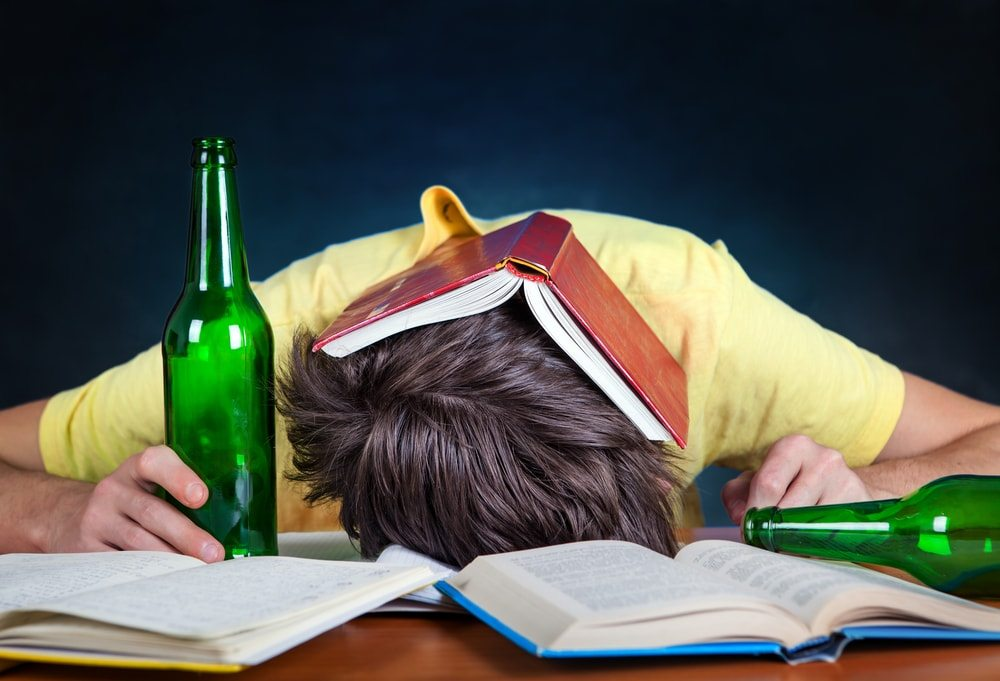

## **1. Introduction**

Alcohol's drawbacks to human body has been discussed for many times, from the scope of health, social science, economy, and many others. The scope is also various, for example, the phase of life of a person, such as adolesence until eldery. For adolensences who are still studying at school, and there are many research saying that alcohol consumption negatively affects students' performance.

Some of the ways that impacts on academic achievement due to the use of alcohol has been seen is in students scoring lower on tests, having lower GPAs, and higher reports of difficulties academically (Balsa et al., 2011; DeSimone, 2010;Jeynes, 2002). It is said that the causes of alcohol abuse tend to be peer pressure, fraternity or sorority involvement, and stress. Students who abuse alcohol can suffer from health concerns, poor academic performance or legal consequences.

This is also a concern for many parents or caregivers, that probabaly students who have been consuming alcohol **tend either to continue their study to a higher education or not**.

### **Problem Statements**

Since each student has different backgrounds, these have hypothetically influence their performance at school. The data provides information about students and their characteristic at school. 

It is important to predict students who have been consuming alcohol to **decide to take a higher education or not**. These are some questions to be answered from the prediction:
- Is it really alcohol that can influence them to their decision about continuing to a higher education?
- Is any other factor that affects this prediction rather than alcohol consumption?

### **Objection**
This prediction is to understand if students are having an academic problem because of alcohol drinking habits, evaluate them if they have a probability to pass or fail to get a higher education. This discussion hopefully can be an insight for the related institutions and organization to make a wise regulation of underage alcohol consumption.

**Target**: education institutions and health organizations

## **2. Importing Libraries**

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import sys
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Data visualization libraries
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

# Imbalance Data Handling
from imblearn.over_sampling import RandomOverSampler 

# Preprocessing Libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Feature Selection
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Import Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import Evaluation Libraries for Classification
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# Save and Load Model
import joblib
import json

## **3. Data Loading**

Dataset is based on an open source data repository, Kaggle.

Link: [Student Alcohol Consumption](https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

In [2]:
url = 'https://raw.githubusercontent.com/nadiaoktiarsy/hacktiv8_p0/main/student-mat.csv'
df = pd.read_csv(url)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


There are 395 students evaluated by 33 features/variables. Since the prediction is about **aiming to a higher education for students with alcohol consumption habits**, then the target is `higher` as it is defined: "*wants to take higher education (binary: yes or no)*". The target is about the actual plan of the student, and then it will be evaluated by predicting and comparing each student's plan with their condition, either pass or fail to continue their study.

Those variables are described as below:

Header | Definition
---|---
`school` | Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
`sex` | Student's sex (binary: 'F' - female or 'M' - male)
`age` | Student's age (numeric: from 15 to 22)
`address` | Student's home address type (binary: 'U' - urban or 'R' - rural)
`famsize` | Family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
`Pstatus` | Parent's cohabitation status (binary: 'T' - living together or 'A' - living apart)
`Medu` | Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
`Fedu` | Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
`Mjob` | Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
`Fjob` | Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
`reason` | Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
`guardian` | Student's guardian (nominal: 'mother', 'father' or 'other')
`traveltime` | Home to school travel time (numeric: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 -> 1 hour)
`studytime` | Weekly study time (numeric: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - > 10 hours)
`failures` | Number of past class failures (numeric: n if 1 < = n < 3, else 4)
`schoolsup` | Extra educational support (binary: yes or no)
`famsup` | Family educational support (binary: yes or no)
`paid` | Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
`activities` | Extra-curricular activities (binary: yes or no)
`nursery` | attended nursery school (binary: yes or no)
`higher` | Wants to take higher education (binary: yes or no)
`internet` | Internet access at home (binary: yes or no)
`romantic` | With a romantic relationship (binary: yes or no)
`famrel` | Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
`freetime` | Free time after school (numeric: from 1 - very low to 5 - very high)
`goout` | Going out with friends (numeric: from 1 - very low to 5 - very high)
`Dalc` | Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
`Walc` | Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
`health` | Current health status (numeric: from 1 - very bad to 5 - very good)
`absences` | Number of school absences (numeric: from 0 to 93)
`G1` | first period grade (numeric: from 0 to 20)
`G2` | second period grade (numeric: from 0 to 20)
`G3` | final grade (numeric: from 0 to 20, output target)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# Converting all columsn from int to float
df = df.astype({'age':'float','absences':'float','G1':'float','G2':'float','G3':'float','Medu':'object','Fedu':'object',
                'traveltime':'object','studytime':'object','failures':'float','famrel':'object','freetime':'object',
                'goout':'object','Dalc':'object','Walc':'object','health':'object','higher':'object'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    float64
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    object 
 7   Fedu        395 non-null    object 
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    object 
 13  studytime   395 non-null    object 
 14  failures    395 non-null    float64
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    object 
 19  nursery     395 non-null    o

In [6]:
df.isna().sum().sum()

0

## **4. Exploratory Data Analysis (EDA)**

### **4.1. Central Tendency**

We can see based on the average of grades in math subject, most students with alcohol consumption habits have scores around 10 (range score 0-20). This indicates that the average performance of these students are neither bad nor good.

In [7]:
# General statistic information
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.696203,1.276043,15.0,16.0,17.0,18.0,22.0
failures,395.0,0.334177,0.743651,0.0,0.0,0.0,0.0,3.0
absences,395.0,5.708861,8.003096,0.0,0.0,4.0,8.0,75.0
G1,395.0,10.908861,3.319195,3.0,8.0,11.0,13.0,19.0
G2,395.0,10.713924,3.761505,0.0,9.0,11.0,13.0,19.0
G3,395.0,10.415190,4.581443,0.0,8.0,11.0,14.0,20.0


**Number of Students who are Aiming Higher Education**

Number of students who want to continue their study to a higher education is also exorbitant, only 5% students do not plan to continue their education. This should be one of the main considerations for the classification prediction later.

In [8]:
# Number of Death Event
df.higher.value_counts()

yes    375
no      20
Name: higher, dtype: int64

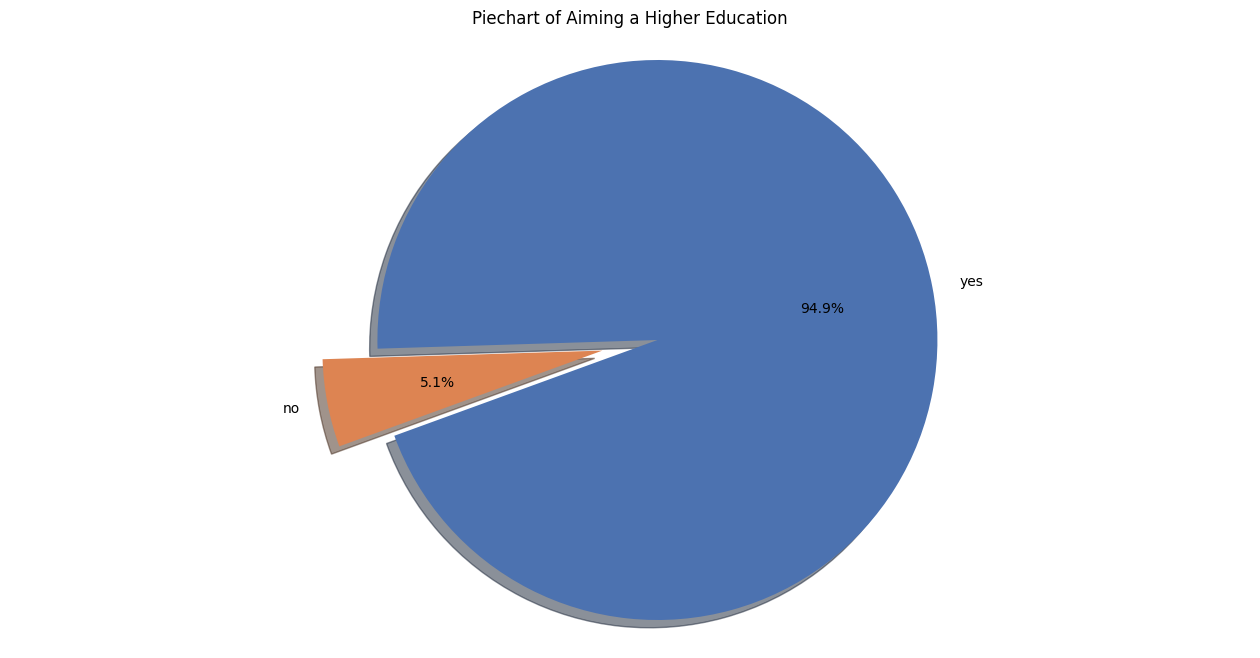

In [9]:
matplotlib.rcParams['figure.figsize'] = (16,8)

# Creating Plot piechart of Sex
higher_edu = dict(df.higher.value_counts())
labels = 'yes', 'no'
sizes = [higher_edu["yes"], higher_edu["no"]]
explode = (0, 0.2)

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Aiming a Higher Education')
plt.show()

**Time Condition against Failures**

As the failures describe number of past class failed, then these bar charts desribe its relationship with time condition, such as `travel time`, `study time` and `free time`, to see if students manage their time wisely while they have alcohol consumption habits.

From the scale 1 as (low) to 5 (high), students with a **high travel time** from their home to school tend to fail in class. Students with **low study time** obviously tend to fail the class, and students with **high free time** tend to fail in class as well. This raises a question what students do when they have free time.

Text(0.5, 1.0, 'Barplot of Free Time and Failures')

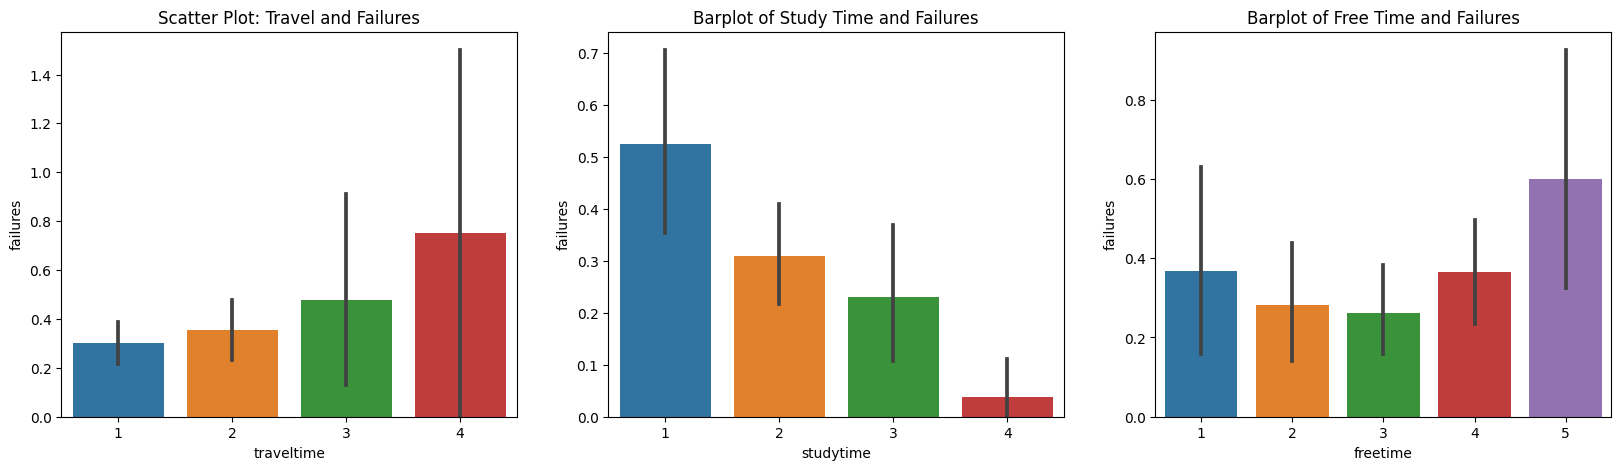

In [10]:
# Bar plot Balance and Purchases
matplotlib.rcParams['figure.figsize'] = (20,5)
plt.subplot(1, 3, 1)
sns.barplot(data=df, x="traveltime", y="failures")
plt.title('Scatter Plot: Travel and Failures')

# Scatter plot Balance and One-Off Purchases
plt.subplot(1, 3, 2)
sns.barplot(data=df, x="studytime", y="failures")
plt.title('Barplot of Study Time and Failures')

# Scatter plot Balance and Installments Purchases
plt.subplot(1, 3, 3)
sns.barplot(data=df, x="freetime", y="failures")
plt.title('Barplot of Free Time and Failures')

**Comparison between Aiming Higher Education with other variables**

Based on these histograms about the comparison of aiming a higher education plan and other variables, it shows that Grades (`G1`, `G1`, and `G3`) are **lower than average** (average score is 10) when students **do not plan** to continue to go to school. Meanwhile majority of students still want to continue their study. Grades will be important variables to be included as well.

Meanwhile for the alcohol consumption habits, there are at least more than 250 students who still want to continue their study, but their daily alcohol consumption is once a day. Meanwhile for weekly, there are around 20 people who want to continue their study while they have a habit of drinking alcohol 5 times a week.

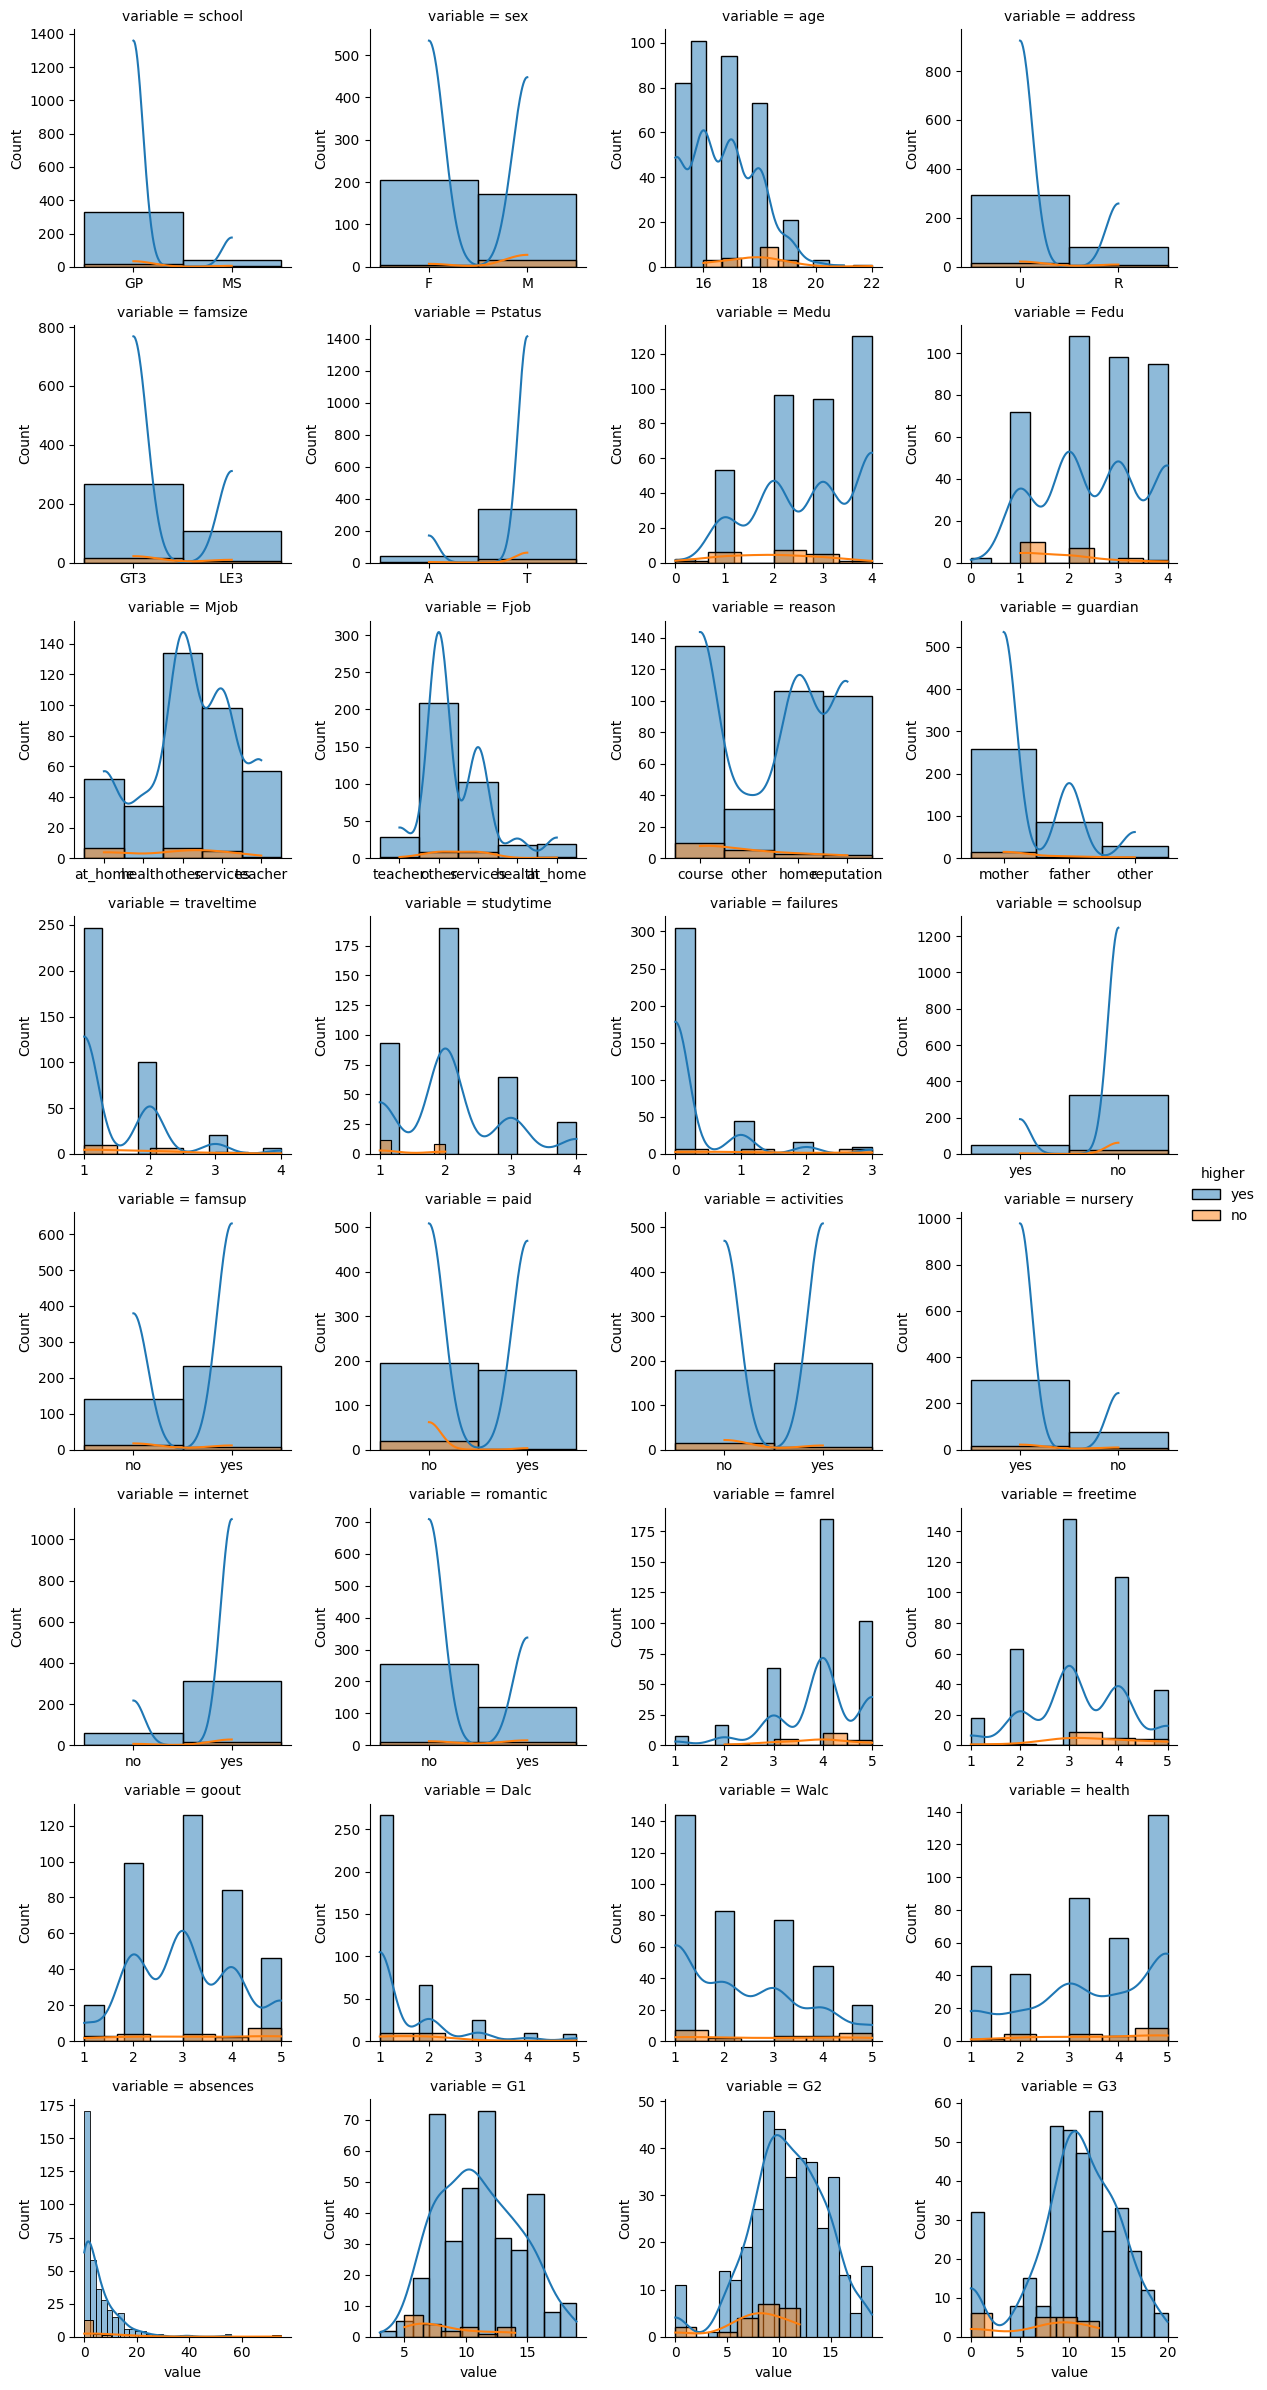

In [11]:
# Creating new dataframe for the histogram
output = 'higher'
cols = [f for f in df.columns if df.dtypes[f] != "int"]
f = pd.melt(df, id_vars=output, value_vars=cols)

# Creating histogram
matplotlib.rcParams['figure.figsize'] = (20,20)
g = sns.FacetGrid(f, hue=output, col="variable", col_wrap=4, sharex=False, sharey=False )
g = g.map(sns.histplot, "value", kde=True).add_legend()

### **4.2. Features Selection**

#### **4.2.1. Correlation Matrix (Heatmap)**

In [12]:
# Splitting between numerical columns and categorical columns
num_columns = ['age','absences','failures','G1','G2','G3']
cat_columns = ['school','sex','address','famsize','Pstatus','Mjon','Fjob','reason','guardian',
               'schoolsup','famsup','paid','activities','nursery','internet','romantic','Medu',
               'Fedu','traveltime','studytime','famrel','freetime','goout',
               'Dalc','Walc','health']

print('Numerical columns  : ', num_columns)
print('Categorical columns  : ', cat_columns)

Numerical columns  :  ['age', 'absences', 'failures', 'G1', 'G2', 'G3']
Categorical columns  :  ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjon', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'internet', 'romantic', 'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']


**Categorical Features**

The correlation between target `higher` and other variables does not seem to show any high correlation. The correlation is either weak and no correlation.

In [13]:
category_col = df.select_dtypes(include=['object','category']).columns.tolist()

# Creating dataframe for categorical columns
df_categorical = df[category_col]

<AxesSubplot: >

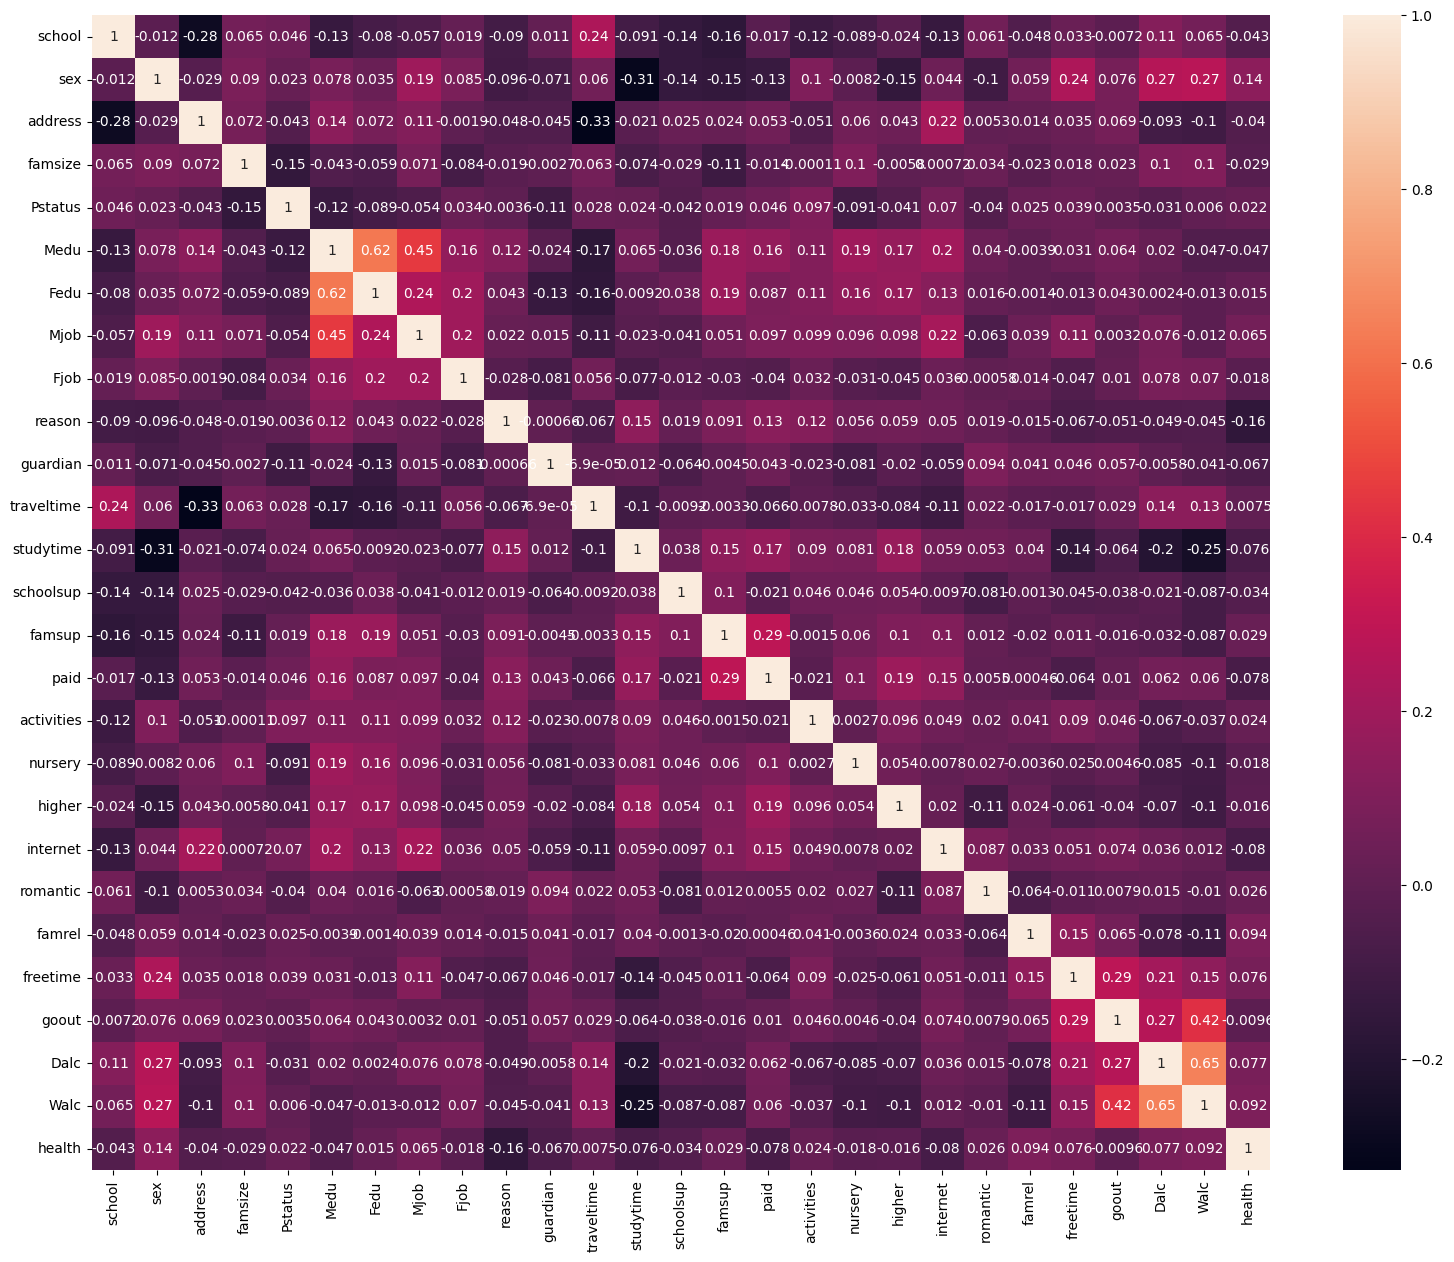

In [14]:
# Using LabelEncoder to make categorical to be numerical data
le = LabelEncoder()
  
# Encode categorical features
df_categorical_encode = df_categorical.copy()
for col in df_categorical_encode.select_dtypes(include='O').columns:
  df_categorical_encode[col]=le.fit_transform(df_categorical_encode[col])
  
# Plotting Correlation Matrix of Categorical columns and Price
plt.figure(figsize=(19,15))
sns.heatmap(df_categorical_encode.corr(),annot=True)

**Numerical Features**

For numerical features, it shows either weak and no correlation. However, the average from these features is higher than categorical features.

In [15]:
# Using OrdinalEncoder to rank target variable
enc = OrdinalEncoder()
higher_edu = df.copy()
enc.fit(higher_edu[['higher']])
higher_edu[['higher']] = enc.transform(higher_edu[['higher']])
higher_edu = higher_edu['higher']

# Creating new dataframe for temperature with price
df_num = df[num_columns]

# Concatenate data numerical and the labeled target (income_bracket)
df_num = pd.concat([df_num, higher_edu], axis=1).sort_index()
df_num

,age,absences,failures,G1,G2,G3,higher
0,18.0,6.0,0.0,5.0,6.0,6.0,1.0
1,17.0,4.0,0.0,5.0,5.0,6.0,1.0
2,15.0,10.0,3.0,7.0,8.0,10.0,1.0
3,15.0,2.0,0.0,15.0,14.0,15.0,1.0
4,16.0,4.0,0.0,6.0,10.0,10.0,1.0
...,...,...,...,...,...,...,...
390,20.0,11.0,2.0,9.0,9.0,9.0,1.0
391,17.0,3.0,0.0,14.0,16.0,16.0,1.0
392,21.0,3.0,3.0,10.0,8.0,7.0,1.0
393,18.0,0.0,0.0,11.0,12.0,10.0,1.0


<AxesSubplot: >

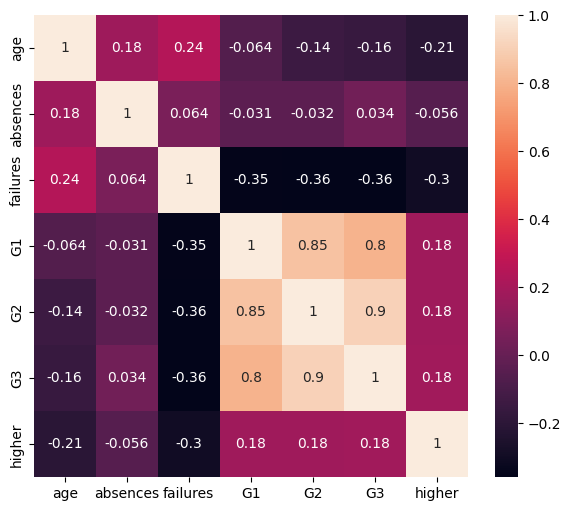

In [16]:
# Plotting Correlation Matrix of Temperature and Price
plt.figure(figsize=(7,6))
sns.heatmap(df_num.corr(),annot=True)

#### **4.2.2. Chi-square**

There are many features under the threshold 5% (*p-value* = 0.05). Variables that will be kept are mainly numerical variables based on its extreme significance, meanwhile categorical will be chosen based on correlation and its significance, and features selection based on intuition.

In [17]:
def isolate():
  X_chi = df_num.drop(['higher'],axis=1)
  y_chi = pd.DataFrame(df_num['higher'])
  
  # k = 4 tells four top features to be selected
  # Score function Chi2 tells the feature to be selected using Chi Square
  train = SelectKBest(score_func=chi2, k=4)
  fit = train.fit(X_chi, y_chi)
  
  chi = pd.Series(fit.scores_)
  chi.index = X_chi.columns
  chi.sort_values(ascending=False)
  print(chi)
isolate()

age          1.679722
absences    13.904640
failures    58.804949
G1          12.644735
G2          16.695665
G3          26.435702
dtype: float64


In [18]:
def isolate():
  X_chi = df_categorical_encode.drop(['higher'],axis=1)
  y_chi = pd.DataFrame(df_categorical_encode['higher'])
  
  # k = 4 tells four top features to be selected
  # Score function Chi2 tells the feature to be selected using Chi Square
  train = SelectKBest(score_func=chi2, k=4)
  fit = train.fit(X_chi, y_chi)
  
  chi = pd.Series(fit.scores_)
  chi.index = X_chi.columns
  chi.sort_values(ascending=False)
  print(chi)
isolate()

school        0.203551
sex           4.746096
address       0.161607
famsize       0.009474
Pstatus       0.068032
Medu          4.896160
Fedu          5.638568
Mjob          2.621708
Fjob          0.263740
reason        1.567802
guardian      0.054164
traveltime    2.983126
studytime     8.215289
schoolsup     1.021242
famsup        1.555041
paid          7.661602
activities    1.805970
nursery       0.238854
internet      0.027396
romantic      2.936389
famrel        0.063631
freetime      0.659585
goout         0.364962
Dalc          3.168860
Walc          5.096007
health        0.075325
dtype: float64


## **5. Data Preprocessing**

After features selection, some features that will be dropped are 16 features. Then, the features that will be used are 17 features.

In [19]:
# Drop target from features table, and from selection analysis
df_before = df.drop(['school','address','famsize','Pstatus','Medu','Fedu','reason','guardian','traveltime','activities','romantic','freetime','goout','nursery','internet','famrel'],axis=1)
df_before

,sex,age,Mjob,Fjob,studytime,failures,schoolsup,famsup,paid,higher,Dalc,Walc,health,absences,G1,G2,G3
0,F,18.0,at_home,teacher,2,0.0,yes,no,no,yes,1,1,3,6.0,5.0,6.0,6.0
1,F,17.0,at_home,other,2,0.0,no,yes,no,yes,1,1,3,4.0,5.0,5.0,6.0
2,F,15.0,at_home,other,2,3.0,yes,no,yes,yes,2,3,3,10.0,7.0,8.0,10.0
3,F,15.0,health,services,3,0.0,no,yes,yes,yes,1,1,5,2.0,15.0,14.0,15.0
4,F,16.0,other,other,2,0.0,no,yes,yes,yes,1,2,5,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,services,services,2,2.0,no,yes,yes,yes,4,5,4,11.0,9.0,9.0,9.0
391,M,17.0,services,services,1,0.0,no,no,no,yes,3,4,2,3.0,14.0,16.0,16.0
392,M,21.0,other,other,1,3.0,no,no,no,yes,3,3,3,3.0,10.0,8.0,7.0
393,M,18.0,services,other,1,0.0,no,no,no,yes,3,4,5,0.0,11.0,12.0,10.0


### **5.1. Data Inference**

In [20]:
# Creating data inference
df_inf = df_before.sample(10, random_state=4).sort_index()
df_inf

,sex,age,Mjob,Fjob,studytime,failures,schoolsup,famsup,paid,higher,Dalc,Walc,health,absences,G1,G2,G3
6,M,16.0,other,other,2,0.0,no,no,no,yes,1,1,3,0.0,12.0,12.0,11.0
47,M,16.0,health,services,4,0.0,no,no,no,yes,1,1,2,4.0,19.0,19.0,20.0
70,M,16.0,other,other,4,0.0,no,yes,yes,yes,1,1,5,0.0,13.0,15.0,15.0
146,F,15.0,health,services,2,3.0,no,yes,no,yes,1,1,3,0.0,6.0,7.0,0.0
160,M,17.0,at_home,other,1,2.0,no,no,no,no,2,2,5,0.0,7.0,6.0,0.0
186,M,16.0,services,services,1,0.0,no,yes,yes,yes,1,2,3,2.0,11.0,12.0,11.0
189,M,17.0,at_home,other,2,0.0,no,no,no,yes,1,5,3,4.0,8.0,9.0,10.0
241,M,17.0,teacher,other,2,0.0,no,yes,yes,yes,2,3,4,2.0,10.0,11.0,12.0
291,F,17.0,health,services,3,0.0,no,yes,yes,yes,1,2,3,0.0,15.0,15.0,15.0
384,M,18.0,other,other,1,1.0,no,no,yes,yes,4,3,3,14.0,6.0,5.0,5.0


In [21]:
# Drop data inference as a new dataframe
df_train_test = df_before.drop(df_inf.index)
df_train_test

,sex,age,Mjob,Fjob,studytime,failures,schoolsup,famsup,paid,higher,Dalc,Walc,health,absences,G1,G2,G3
0,F,18.0,at_home,teacher,2,0.0,yes,no,no,yes,1,1,3,6.0,5.0,6.0,6.0
1,F,17.0,at_home,other,2,0.0,no,yes,no,yes,1,1,3,4.0,5.0,5.0,6.0
2,F,15.0,at_home,other,2,3.0,yes,no,yes,yes,2,3,3,10.0,7.0,8.0,10.0
3,F,15.0,health,services,3,0.0,no,yes,yes,yes,1,1,5,2.0,15.0,14.0,15.0
4,F,16.0,other,other,2,0.0,no,yes,yes,yes,1,2,5,4.0,6.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,20.0,services,services,2,2.0,no,yes,yes,yes,4,5,4,11.0,9.0,9.0,9.0
391,M,17.0,services,services,1,0.0,no,no,no,yes,3,4,2,3.0,14.0,16.0,16.0
392,M,21.0,other,other,1,3.0,no,no,no,yes,3,3,3,3.0,10.0,8.0,7.0
393,M,18.0,services,other,1,0.0,no,no,no,yes,3,4,5,0.0,11.0,12.0,10.0


In [22]:
# Splitting between numerical columns and categorical columns
num_columns = ['age','absences','failures','G1','G2','G3']
cat_columns = ['sex','Mjob','Fjob','schoolsup','famsup','paid','studytime','Dalc','Walc','health']

print('Numerical columns  : ', num_columns)
print('Categorical columns  : ', cat_columns)

Numerical columns  :  ['age', 'absences', 'failures', 'G1', 'G2', 'G3']
Categorical columns  :  ['sex', 'Mjob', 'Fjob', 'schoolsup', 'famsup', 'paid', 'studytime', 'Dalc', 'Walc', 'health']


### **5.2. Train and Test Set**

In [23]:
# Defining X and y
X = df_train_test.drop(['higher'],axis=1)
y = pd.DataFrame(df_train_test['higher'])

### **5.3. Imbalance Data**

As already mentioned from EDA, there is an imbalance data between students who want to continue their study to a higher education or not. The problem with training the model with an imbalanced dataset is that **the model will be biased towards the majority class only**. This causes a problem when we are interested in the prediction of the minority class, in this context is that student who do not plan to continue their study should be understood as well if there is any alcohol impact from their decision.

In [24]:
print('Original number of target: ', len(y))

Original number of target:  385


Oversampling will be done to handle this imbalance data. The original number of target is 395, and after using RandomOverSampler, the new target is 732.

In [25]:
# Define Oversampling
ros = RandomOverSampler(random_state=42)

# Fit an resample
X, y = ros.fit_resample(X, y)

In [26]:
# Encode target
enc = OrdinalEncoder()
y = enc.fit_transform(y)

print('New number of target after oversampling: ', len(y))

New number of target after oversampling:  732


In [27]:
# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=3)

print('Train size : ', X_train.shape)
print('Test size. : ', X_test.shape)

X_train.head()

Train size :  (512, 16)
Test size. :  (220, 16)


,sex,age,Mjob,Fjob,studytime,failures,schoolsup,famsup,paid,Dalc,Walc,health,absences,G1,G2,G3
718,M,16.0,services,services,1,1.0,no,yes,no,1,1,2,16.0,12.0,11.0,12.0
598,M,19.0,services,at_home,1,3.0,no,yes,no,1,1,4,0.0,5.0,0.0,0.0
326,F,17.0,services,other,3,0.0,no,no,no,1,3,5,16.0,16.0,15.0,15.0
574,M,18.0,at_home,services,1,0.0,no,yes,yes,2,3,3,3.0,14.0,12.0,12.0
224,M,17.0,other,other,2,0.0,no,yes,yes,1,1,1,4.0,11.0,11.0,11.0


### **5.4. Data Skewness and Outliers**

The skewness from most of features are mostly Normal Distribution, and there is no missing value in the original dataset. After checking the outlier, it shows there are only 1 or 3 small outliers, and apparently outlier is not a big deal for this dataset either.

In [28]:
X_train.skew()

age          0.346330
studytime    0.901485
failures     1.207318
Dalc         2.099184
Walc         0.457941
health      -0.357267
absences     3.905321
G1           0.397935
G2          -0.442216
G3          -0.650284
dtype: float64

### **5.5. Pipelines**

In this part is to exaplain that the dataset will be scaled with StandardScaler and encoded by OneHotEncoder, which are based on the skewness and the need of the data itself.

In [29]:
# Preprocessing for numerical data
numerical_pipe = Pipeline(steps=
                          [('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_pipe = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipe, num_columns),
        ('cat', categorical_pipe, cat_columns)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'absences', 'failures', 'G1', 'G2',
                                  'G3']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'Mjob', 'Fjob', 'schoolsup', 'famsup',
                                  'paid', 'studytime', 'Dalc', 'Walc',
                                  'health'])])

## **6. Model Definition**

The analysis will be done by Classification models to predict `higher`, if the student is predicted to continue a higher study, using classification algorithms:

- Logistic Regression
- SVM
- Decision Tree
- Random Forest

All algorithms will use its own default parameter, and the pipeline will be made for each algorithm.

### **6.1. Logistic Regression**

In [30]:
# Defining Logistic Regression
logreg = LogisticRegression(random_state=3)

In [31]:
# Bundle preprocessing and modeling code in a pipeline
pipe_log = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logreg', logreg)
                             ])

pipe_log

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences',
                                                   'failures', 'G1', 'G2',
                                                   'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'studytime', 'Dalc',
                                                   'Walc', 'health'])])),
                ('logreg', LogisticRegression(random_state=3))])

### **6.2. SVM**

In [32]:
# SVM Classifier model
svm = SVC(random_state=3)

In [33]:
# Bundle preprocessing and modeling code in a pipeline
pipe_svm = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svm', svm)
                             ])

pipe_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences',
                                                   'failures', 'G1', 'G2',
                                                   'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'studytime', 'Dalc',
                                                   'Walc', 'health'])])),
                ('svm', SVC(random_state=3))])

### **6.3. Decision Tree**

In [34]:
# Defining DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=3)

In [35]:
# Bundle preprocessing and modeling code in a pipeline
pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                           ('dt', dt)
                             ])

pipe_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences',
                                                   'failures', 'G1', 'G2',
                                                   'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'studytime', 'Dalc',
                                                   'Walc', 'health'])])),
                ('dt', DecisionTreeClassifier(random_state=3))])

### **6.4. Random Forest**

In [36]:
# Define RandomForestClassifier 
rfc = RandomForestClassifier(random_state=3)

In [37]:
# Bundle preprocessing and modeling code in a pipeline
pipe_rfc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('rfc', rfc)
                             ])

pipe_rfc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'absences',
                                                   'failures', 'G1', 'G2',
                                                   'G3']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'Mjob', 'Fjob',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'studytime', 'Dalc',
                                                   'Walc', 'health'])])),
                ('rfc', RandomForestClassifier(random_state=3))])

## **7. Model Training**

After model definition, the model will be train with the corresponding algorithms. Cross-Validation for each algorithm is also checked to choose which one is a better model for later.

**Summary**: Based on the cross validation results, it can be seen that Logistic Regression and Decision Tree have better **mean F1-Score**, which is not too overfitting than SVM and Random Forest Classifier.

**F1-Score Cross-Validation (Mean) with Default Paremeter:**
* Logistic Regression: 93%
* SVM: 98%
* Decision Tree: 94%
* Random Forest Classifier: 99%

Overfitting should be avoided **before the model starts to learn the noise**, which will create less accurate prediction in supervised models. Thus, it is suggested to choose the algorithm either Logistic Regression or Decision Tree.

### **7.1. Logistic Regression**

In [38]:
# Default Parameters
# Fit model 
pipe_log.fit(X_train, y_train)

# Prediction, using X_train
y_train_log = pipe_log.predict(X_train)

# Prediction, using X_test
y_test_log = pipe_log.predict(X_test)

#### **7.1.1. Cross-Validation (Default)**

In [39]:
# Cross Validation using `cross_val_score` for train set
train_cross_val = cross_val_score(pipe_log, 
                                  X, 
                                  y, 
                                  cv=5, 
                                  scoring='f1')

print("Accuracy Score All - Cross Validation :", train_cross_val)
print("Mean - Cross-Validation               :", train_cross_val.mean())
print("Standard Deviation Cross-Validation   :", train_cross_val.std())

Accuracy Score All - Cross Validation : [0.95238095 0.91851852 0.91851852 0.87591241 0.86821705]
Mean - Cross-Validation               : 0.9067094904881359
Standard Deviation Cross-Validation   : 0.030967455843183916


#### **7.1.2. Hyperparameter Tuning**

In [40]:
# Define Hyperparameters
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = [int(x) for x in np.linspace(start=10, stop=100, num = 7)]
penalty = ['l1', 'l2', 'elasticnet', 'none']

param_grid_log = {'logreg__solver': solver,
              'logreg__max_iter':max_iter,
              'logreg__penalty': penalty}
param_grid_log

{'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'logreg__max_iter': [10, 25, 40, 55, 70, 85, 100],
 'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none']}

In [42]:
# Train with Grid Search
logreg_gridcv = GridSearchCV(pipe_log,
                          param_grid_log,
                          n_jobs=-1,
                          verbose=2,
                          scoring='f1')

logreg_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'absences',
                                                                          'failures',
                                                                          'G1',
                                                                          'G2',
                                                                          'G3']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'schoolsup',
                                                                          'famsup',
                                                                          'paid',
                                                                          'studytime',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health'])])),
                                       ('logreg',
                                        LogisticRegression(random_state=3))]),
             n_jobs=-1,
             param_grid={'logreg__max_iter': [10, 25, 40, 55, 70, 85, 100],
                         'logreg__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'logreg__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                            'sag', 'saga']},
             scoring='f1', verbose=2)

In [43]:
# Display Best Hyperparamters from Grid Search for Train Set
logreg_gridcv.best_params_

{'logreg__max_iter': 25, 'logreg__penalty': 'none', 'logreg__solver': 'lbfgs'}

#### **7.1.3. Redefine Model**

In [44]:
# Redefining Logistic Regression with best estimator
logreg_gridcv_best = logreg_gridcv.best_estimator_

In [45]:
# Prediction Final
y_train_log_final = logreg_gridcv_best.predict(X_train)
y_test_log_final = logreg_gridcv_best.predict(X_test)

### **7.2. SVM**

In [46]:
# Fit model 
pipe_svm.fit(X_train, y_train)

# Prediction, using X_train
y_train_svm = pipe_svm.predict(X_train)

# Prediction, using X_test
y_test_svm = pipe_svm.predict(X_test)

#### **7.2.1. Cross-Validation (Default)**

In [47]:
# Cross Validation using `cross_val_score` for train set
train_cross_val = cross_val_score(pipe_svm, 
                                  X, 
                                  y, 
                                  cv=5, 
                                  scoring='f1')

print("Accuracy Score All - Cross Validation :", train_cross_val)
print("Mean - Cross-Validation               :", train_cross_val.mean())
print("Standard Deviation Cross-Validation   :", train_cross_val.std())

Accuracy Score All - Cross Validation : [0.99319728 0.96453901 0.97902098 0.98611111 0.95714286]
Mean - Cross-Validation               : 0.9760022466557421
Standard Deviation Cross-Validation   : 0.013372011472016034


#### **7.2.2. Hyperparameter Tuning**

In [48]:
# Define Hyperparameters
C = [int(x) for x in np.linspace(start=10, stop=100, num = 7)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
gamma = ['scale', 'auto']
decision_function_shape = ['ovo', 'ovr']

param_grid_svm = {'svm__C': C,
              'svm__kernel':kernel,
              'svm__gamma': gamma,
              'svm__decision_function_shape': decision_function_shape}
param_grid_svm

{'svm__C': [10, 25, 40, 55, 70, 85, 100],
 'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
 'svm__gamma': ['scale', 'auto'],
 'svm__decision_function_shape': ['ovo', 'ovr']}

In [49]:
# Train with Grid Search
svm_gridcv = GridSearchCV(pipe_svm,
                          param_grid_svm,
                          n_jobs=-1,
                          verbose=2,
                          scoring='f1')

svm_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'absences',
                                                                          'failures',
                                                                          'G1',
                                                                          'G2',
                                                                          'G3']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'schoolsup',
                                                                          'famsup',
                                                                          'paid',
                                                                          'studytime',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health'])])),
                                       ('svm', SVC(random_state=3))]),
             n_jobs=-1,
             param_grid={'svm__C': [10, 25, 40, 55, 70, 85, 100],
                         'svm__decision_function_shape': ['ovo', 'ovr'],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid',
                                         'precomputed']},
             scoring='f1', verbose=2)

In [50]:
# Display Best Hyperparamters from Grid Search for Train Set
svm_gridcv.best_params_

{'svm__C': 10,
 'svm__decision_function_shape': 'ovo',
 'svm__gamma': 'scale',
 'svm__kernel': 'rbf'}

#### **7.2.3. Redefine Model**

In [51]:
# Redefining Logistic Regression with best estimator
svm_gridcv_best = svm_gridcv.best_estimator_

In [52]:
# Prediction Final
y_train_svm_final = svm_gridcv_best.predict(X_train)
y_test_svm_final = svm_gridcv_best.predict(X_test)

### **7.3. Decision Tree**

In [53]:
# Fit model 
pipe_dt.fit(X_train, y_train)

# Prediction, using X_train
y_train_dt = pipe_dt.predict(X_train)

In [54]:
# Prediction, using X_test
y_test_dt = pipe_dt.predict(X_test)

#### **7.3.1. Cross-Validation (Default)**

In [55]:
# Cross Validation using `cross_val_score` for train set
train_cross_val = cross_val_score(pipe_dt, 
                                  X, 
                                  y, 
                                  cv=5, 
                                  scoring='f1')

print("Accuracy Score All - Cross Validation :", train_cross_val)
print("Mean - Cross-Validation               :", train_cross_val.mean())
print("Standard Deviation Cross-Validation   :", train_cross_val.std())

Accuracy Score All - Cross Validation : [0.99319728 0.98611111 0.94964029 0.96453901 0.86821705]
Mean - Cross-Validation               : 0.9523409478296448
Standard Deviation Cross-Validation   : 0.04481646884970084


#### **7.3.2. Hyperparameter Tuning**

In [56]:
# Define Hyperparameters
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = [i for i in range(2, 12, 1)]
min_samples_split = [i for i in range(2, 10, 2)]
min_samples_leaf = [i for i in range(2, 10, 2)]

param_grid_dt = {'dt__criterion': criterion,
                  'dt__splitter': splitter,
                  'dt__max_depth': max_depth,
                  'dt__min_samples_split': min_samples_split,
                  'dt__min_samples_leaf': min_samples_leaf}
param_grid_dt

{'dt__criterion': ['gini', 'entropy', 'log_loss'],
 'dt__splitter': ['best', 'random'],
 'dt__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'dt__min_samples_split': [2, 4, 6, 8],
 'dt__min_samples_leaf': [2, 4, 6, 8]}

In [57]:
# Train with Grid Search
dt_gridcv = GridSearchCV(pipe_dt,
                          param_grid_dt,
                          n_jobs=-1,
                          verbose=2,
                          scoring='f1')

dt_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'absences',
                                                                          'failures',
                                                                          'G1',
                                                                          'G2',
                                                                          'G3']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'schoolsup',
                                                                          'famsup',
                                                                          'paid',
                                                                          'studytime',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health'])])),
                                       ('dt',
                                        DecisionTreeClassifier(random_state=3))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'dt__min_samples_leaf': [2, 4, 6, 8],
                         'dt__min_samples_split': [2, 4, 6, 8],
                         'dt__splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [58]:
# Display Best Hyperparamters from Grid Search for Train Set
dt_gridcv.best_params_

{'dt__criterion': 'gini',
 'dt__max_depth': 11,
 'dt__min_samples_leaf': 2,
 'dt__min_samples_split': 8,
 'dt__splitter': 'random'}

#### **7.3.3. Redefine Model**

In [59]:
# Redefining Logistic Regression with best estimator
dt_gridcv_best = dt_gridcv.best_estimator_

In [60]:
# Prediction Final
y_train_dt_final = dt_gridcv_best.predict(X_train)
y_test_dt_final = dt_gridcv_best.predict(X_test)

### **7.4. Random Forest**

In [61]:
# Fit model 
pipe_rfc.fit(X_train, y_train)

# Prediction, using X_train
y_train_rfc = pipe_rfc.predict(X_train)

# Prediction, using X_test
y_test_rfc = pipe_rfc.predict(X_test)

#### **7.4.1. Cross-Validation (Default)**

In [62]:
# Cross Validation using `cross_val_score` for train set
train_cross_val = cross_val_score(pipe_rfc, 
                                  X, 
                                  y, 
                                  cv=5, 
                                  scoring='f1')

print("Accuracy Score All - Cross Validation :", train_cross_val)
print("Mean - Cross-Validation               :", train_cross_val.mean())
print("Standard Deviation Cross-Validation   :", train_cross_val.std())

Accuracy Score All - Cross Validation : [0.99319728 0.98611111 0.98611111 1.         0.97902098]
Mean - Cross-Validation               : 0.9888880960309532
Standard Deviation Cross-Validation   : 0.007139002108060406


#### **7.4.2. Hyperparameter Tuning**

In [63]:
# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
min_samples_leaf = [int(x) for x in np.linspace(3, 6, num = 4)]
min_samples_split = [2, 6, 10]
bootstrap = [True, False]

param_grid_rfc = {'rfc__n_estimators': n_estimators,
               'rfc__max_features': max_features,
               'rfc__max_depth': max_depth,
               'rfc__min_samples_leaf': min_samples_leaf,
               'rfc__criterion':['entropy','gini'],
               'rfc__bootstrap': bootstrap}
param_grid_rfc

{'rfc__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'rfc__max_features': ['auto', 'sqrt'],
 'rfc__max_depth': [2, 4, 6, 8, 10],
 'rfc__min_samples_leaf': [3, 4, 5, 6],
 'rfc__criterion': ['entropy', 'gini'],
 'rfc__bootstrap': [True, False]}

In [64]:
# Train with Grid Search
rfc_gridcv = GridSearchCV(pipe_rfc,
                          param_grid_rfc,
                          n_jobs=-1,
                          verbose=2,
                          scoring='f1')

rfc_gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'absences',
                                                                          'failures',
                                                                          'G1',
                                                                          'G2',
                                                                          'G3']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'Mjob',
                                                                          'Fjob',
                                                                          'schoolsup',
                                                                          'famsup',
                                                                          'paid',
                                                                          'studytime',
                                                                          'Dalc',
                                                                          'Walc',
                                                                          'health'])])),
                                       ('rfc',
                                        RandomForestClassifier(random_state=3))]),
             n_jobs=-1,
             param_grid={'rfc__bootstrap': [True, False],
                         'rfc__criterion': ['entropy', 'gini'],
                         'rfc__max_depth': [2, 4, 6, 8, 10],
                         'rfc__max_features': ['auto', 'sqrt'],
                         'rfc__min_samples_leaf': [3, 4, 5, 6],
                         'rfc__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80,
                                               90, 100]},
             scoring='f1', verbose=2)

In [65]:
# Display Best Hyperparamters from Grid Search for Train Set
rfc_gridcv.best_params_

{'rfc__bootstrap': False,
 'rfc__criterion': 'entropy',
 'rfc__max_depth': 10,
 'rfc__max_features': 'auto',
 'rfc__min_samples_leaf': 3,
 'rfc__n_estimators': 80}

#### **7.4.3. Redefine Model**

In [66]:
# Redefining Logistic Regression with best estimator
rfc_gridcv_best = svm_gridcv.best_estimator_

In [67]:
# Prediction Final
y_train_rfc_final = rfc_gridcv_best.predict(X_train)
y_test_rfc_final = rfc_gridcv_best.predict(X_test)

## **8. Model Evaluation**

Model evaluations from overall algorithms show the differene between default parameter and hyperparamter tuned from each algorithm. The evaluation is based on F1-Score, since the previous cross-validation for each algorithm uses F1-Score as well.

In summary, all classes are working for each model, where most 

*1. Logistic Regression*
> The F1-Score of Logistic Regression from default parameter to hyperparameter tuned is increasing.

*2. SVM*
> The F1-Score of SMV from default parameter to hyperparamter tuned is increasing, but hyperparamter tuned model creastes the f1-score be overfit even more, where it reaches 100%.

*3. Decision Tree*
> F1-Score from default parameter to hyperparameter tuned is decreasing for train set. Meanwhile, for test set following train set as well, instead it is increasing.

*4. Random Forest Classifier*
> F1-Score for the models are not changed at all (both are 100%), from default parameter to hyperparameter tuned model. This means that the algorithm is too strong for data with relatively too little for Ensamble Learning algorithm.

### **8.1. Logistic Regression**

An increase F1-score and accuracy from Logistic Regression is included as good model rather than the other models. However, we should be careful for the hyperparameter tuned model, which can lead an overfitting when we simulate for the data inference. We can use Logistic Regression with default parameter instead to stop the training be more overfit, or before the model learn the noises for the additional data in the future.

In [68]:
# Model Evaluation (Default Parameter)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_log))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_log))

F1 Score - Train Set  :  0.9271255060728745
F1 Score - Test Set  :  0.9308755760368664


In [69]:
# Model Evaluation (Hyperparameter Tuned)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_log_final))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_log_final))

F1 Score - Train Set  :  0.9676113360323887
F1 Score - Test Set  :  0.9577464788732395


In [70]:
# Evaluating Train set (Default Parameter)
print('Train Set (Defaul Parameter)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_log))
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_log), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_log), '\n')

Train Set (Defaul Parameter)
Accuracy - Train Set  :  0.9296875
F1 Score - Train Set  :  0.9271255060728745 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       257
         1.0       0.96      0.90      0.93       255

    accuracy                           0.93       512
   macro avg       0.93      0.93      0.93       512
weighted avg       0.93      0.93      0.93       512
 



In [71]:
# Evaluating Train set (Hyperparameter Tuned)
print('Train Set (Hyperparameter Tuned)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_log_final),)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_log_final), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_log_final), '\n')

Train Set (Hyperparameter Tuned)
Accuracy - Train Set  :  0.96875
F1 Score - Train Set  :  0.9676113360323887 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       257
         1.0       1.00      0.94      0.97       255

    accuracy                           0.97       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.97      0.97      0.97       512
 



The confusion matrices below show there is a difference between default and hyperparamter tuned model. The model with default parameter has both accuracy and F1-score 93%. This means the model is good enough to class and predict the data.

However, after the hyperparamter tuning, it seems that the model is getting overfit even more. For example, there are 16 students who wants to continue their study, but the prediction shows that they should not continue thair study (False Negative).

Confusion Matrix Train Set LogReg (Default Parameter)


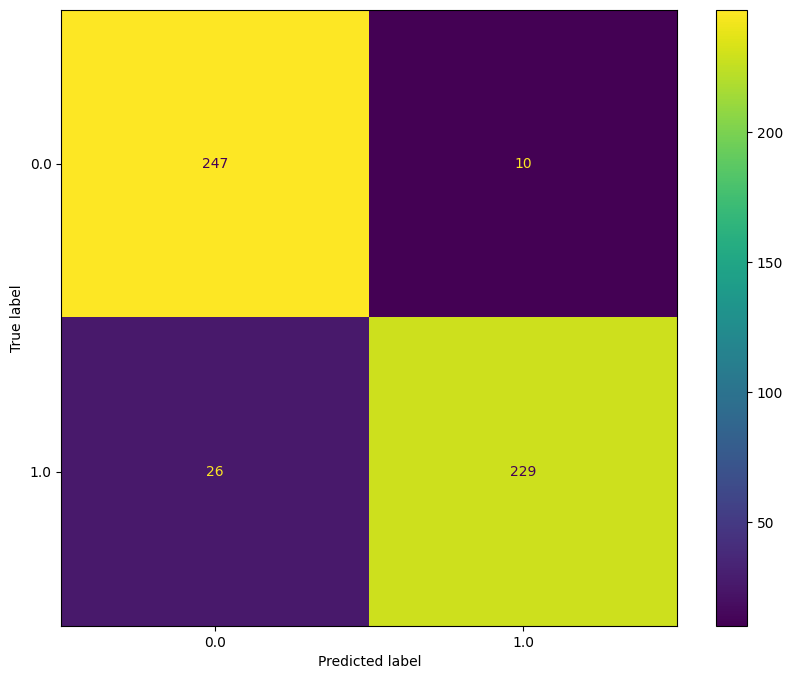

In [72]:
# Creating confusion matrix for train set (default parameter)
print('Confusion Matrix Train Set LogReg (Default Parameter)')
cm = confusion_matrix(y_train, y_train_log, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

Confusion Matrix Train Set LogReg (Hyperparameter Tuned)


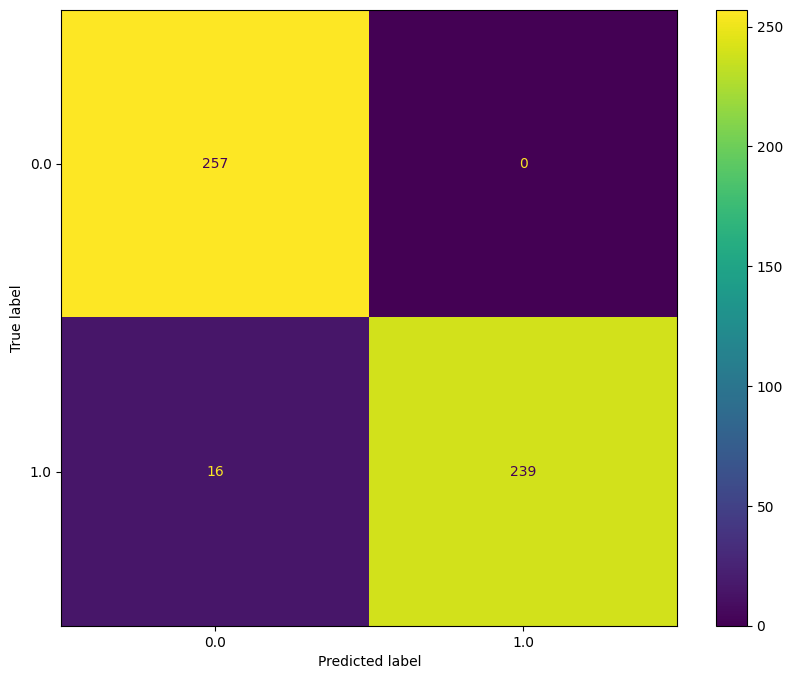

In [73]:
# Creating confusion matrix for train set (defaul parameter)
print('Confusion Matrix Train Set LogReg (Hyperparameter Tuned)')
cm = confusion_matrix(y_train, y_train_log_final, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=logreg.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

### **8.2. SVM**

SVM is too strong for this dataset, which makes the F1-score is 100%. So, it is basically overfit for the small data, and SVM is better to be used for a bigger dataset.

In [74]:
# Model Evaluation (Default Parameter)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_svm))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_svm))

F1 Score - Train Set  :  0.9940828402366864
F1 Score - Test Set  :  0.9909090909090909


In [75]:
# Model Evaluation (Hyperparameter Tuned)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_svm_final))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_svm_final))

F1 Score - Train Set  :  1.0
F1 Score - Test Set  :  0.9909090909090909


In [76]:
# Evaluating Train set (Default Parameter)
print('Train Set (Defaul Parameter)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_svm))
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_svm), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_svm), '\n')

Train Set (Defaul Parameter)
Accuracy - Train Set  :  0.994140625
F1 Score - Train Set  :  0.9940828402366864 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       257
         1.0       1.00      0.99      0.99       255

    accuracy                           0.99       512
   macro avg       0.99      0.99      0.99       512
weighted avg       0.99      0.99      0.99       512
 



In [77]:
# Evaluating Train set (Hyperparameter Tuned)
print('Train Set (Hyperparameter Tuned)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_svm_final),)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_svm_final), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_svm_final), '\n')

Train Set (Hyperparameter Tuned)
Accuracy - Train Set  :  1.0
F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       257
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512
 



Further analysis for confusion matrix from SVM models look overfitting, where there is 3 students with False Positive move to True Positive in the SVM with hyperparameter tuning. The classes here work too well to the model, which is why the model for SVM is too strong for the data.

Confusion Matrix Train Set SVM (Default Parameter)


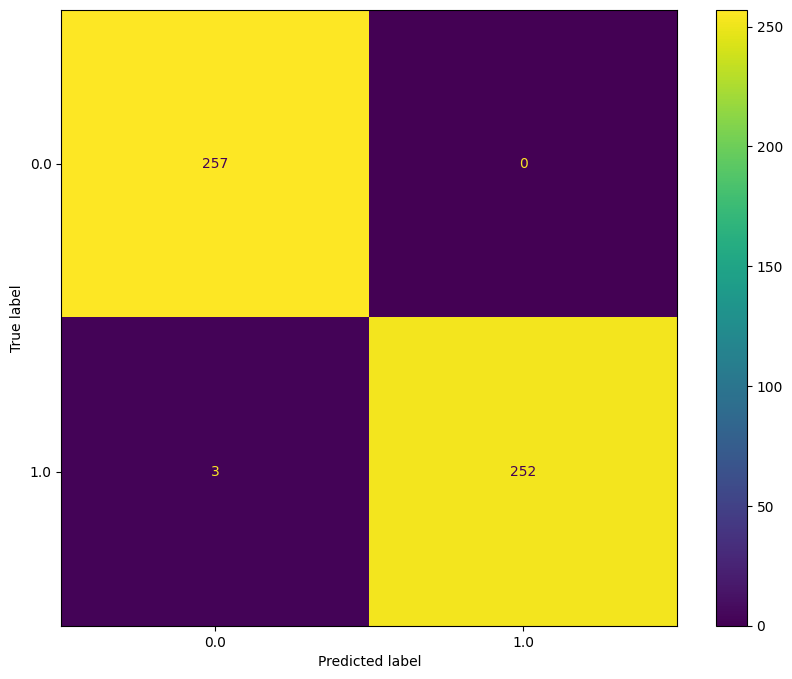

In [78]:
# Creating confusion matrix for train set (default parameter)
print('Confusion Matrix Train Set SVM (Default Parameter)')
cm = confusion_matrix(y_train, y_train_svm, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

Confusion Matrix Train Set SVM (Hyperparameter Tuned)


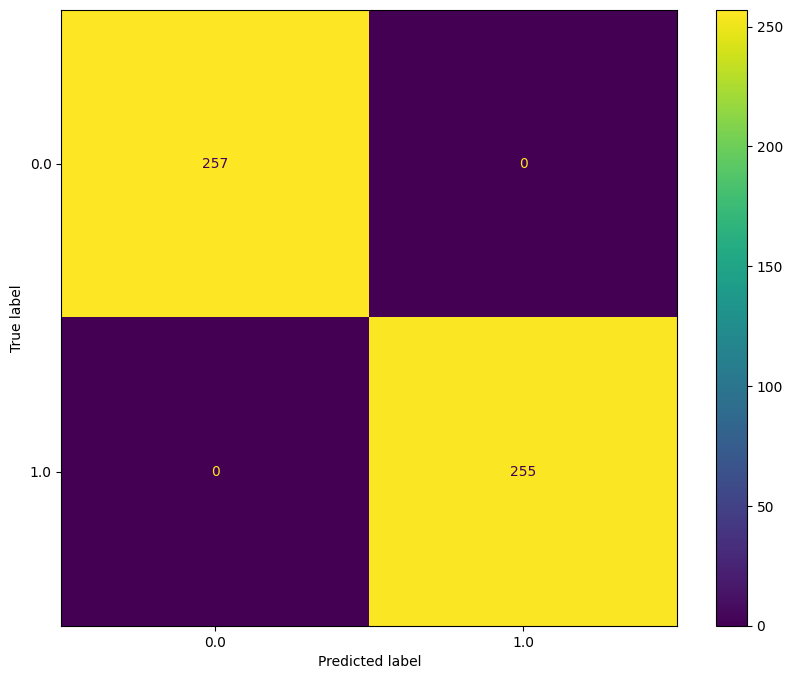

In [79]:
# Creating confusion matrix for train set (hyperparameter tuned)
print('Confusion Matrix Train Set SVM (Hyperparameter Tuned)')
cm = confusion_matrix(y_train, y_train_svm_final, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=svm.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

### **8.3. Decision Tree**

Decision Tree is having a decrase compare to the other models, although it is just slightly decreasing. Decision tree will not be chosen as the main model later, although it has a potential, but the result for F1-score and accuracy could be overfit. This can cause a bias as well.

In [80]:
# Model Evaluation (Default Parameter)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_dt))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_dt))

F1 Score - Train Set  :  1.0
F1 Score - Test Set  :  0.9769585253456221


In [81]:
# Model Evaluation (Hyperparameter Tuned)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_dt_final))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_dt_final))

F1 Score - Train Set  :  0.9960629921259843
F1 Score - Test Set  :  0.9863013698630138


In [82]:
# Evaluating Train set (Default Parameter)
print('Train Set (Defaul Parameter)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_dt))
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_dt), '\n')

Train Set (Defaul Parameter)
Accuracy - Train Set  :  1.0
F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       257
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512
 



In [83]:
# Evaluating Train set (Hyperparameter Tuned)
print('Train Set (Hyperparameter Tuned)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_dt_final),)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_dt_final), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_dt_final), '\n')

Train Set (Hyperparameter Tuned)
Accuracy - Train Set  :  0.99609375
F1 Score - Train Set  :  0.9960629921259843 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       257
         1.0       1.00      0.99      1.00       255

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512
 



Decision Tree confusion matrices look different from Logistic Regression, where the default parameter is too strong to train the dataset and it classifies the data too accurately, which can lead a bias.

However, after hyperparameter tuning, apparently the model is less accurate although it is still inculded as overfit (accuracy and f1-score are not 100% anymore, although still high). This means, hyperparameter tuning can ether decrease the quality of the model, or creating less biased classification.

We can see there are 2 students moving from True Negative to False Positive, where these 2 students is said not to continue their study but actually they aim to continue their study.

Confusion Matrix Train Set Decision Tree (Default Parameter)


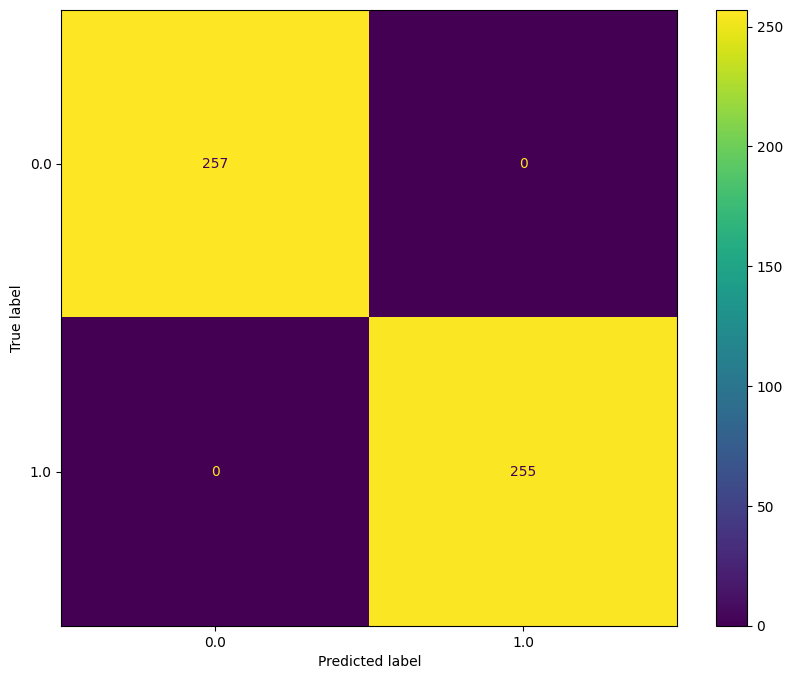

In [84]:
# Creating confusion matrix for train set (default parameter)
print('Confusion Matrix Train Set Decision Tree (Default Parameter)')
cm = confusion_matrix(y_train, y_train_dt, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

Confusion Matrix Train Set Decision Tree (Hyperparameter Tuned)


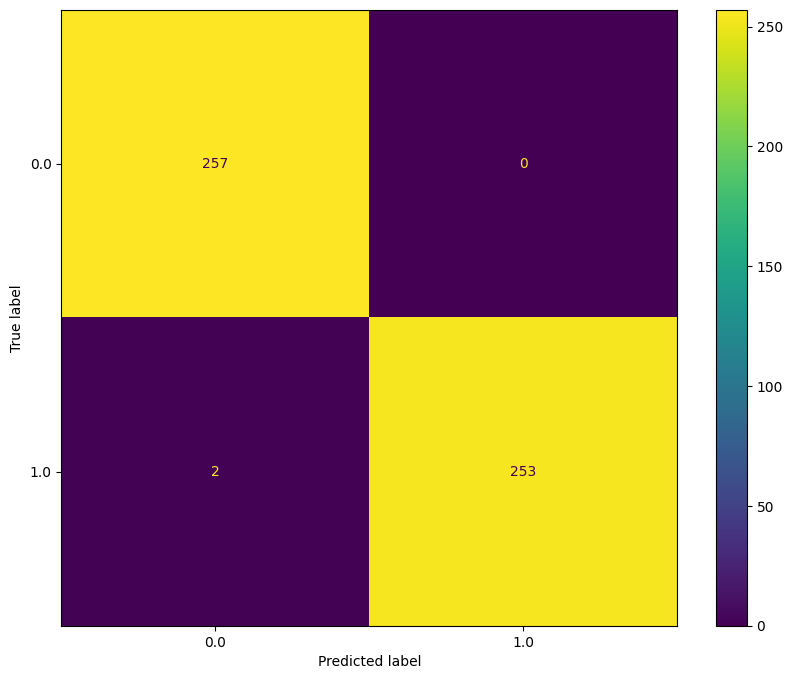

In [85]:
# Creating confusion matrix for train set (hyperparameter tuned)
print('Confusion Matrix Train Set Decision Tree (Hyperparameter Tuned)')
cm = confusion_matrix(y_train, y_train_dt_final, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

### **8.4. Random Forest**

There is no change between default parameter and hyperparameter tuned model. No further analysis for this, however, we can take notes that Ensamble Learning such as Random Forest Classifier should be used for a bigger dataset rather than relatively small dataset like this.

In [86]:
# Model Evaluation (Default Parameter)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_rfc))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_rfc))

F1 Score - Train Set  :  1.0
F1 Score - Test Set  :  0.9909090909090909


In [87]:
# Model Evaluation (Hyperparameter Tuned)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_rfc_final))
print('F1 Score - Test Set  : ', f1_score(y_test, y_test_rfc_final))

F1 Score - Train Set  :  1.0
F1 Score - Test Set  :  0.9909090909090909


In [88]:
# Evaluating Train set (Default Parameter)
print('Train Set (Defaul Parameter)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_rfc))
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_rfc), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_rfc), '\n')

Train Set (Defaul Parameter)
Accuracy - Train Set  :  1.0
F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       257
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512
 



In [89]:
# Evaluating Train set (Hyperparameter Tuned)
print('Train Set (Hyperparameter Tuned)')
print('Accuracy - Train Set  : ', accuracy_score(y_train, y_train_rfc_final),)
print('F1 Score - Train Set  : ', f1_score(y_train, y_train_rfc_final), '\n')
print('Classification Report : \n', classification_report(y_train, y_train_rfc_final), '\n')

Train Set (Hyperparameter Tuned)
Accuracy - Train Set  :  1.0
F1 Score - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       257
         1.0       1.00      1.00      1.00       255

    accuracy                           1.00       512
   macro avg       1.00      1.00      1.00       512
weighted avg       1.00      1.00      1.00       512
 



Confusion Matrix Train Set Random Forest Classifier (Default Parameter)


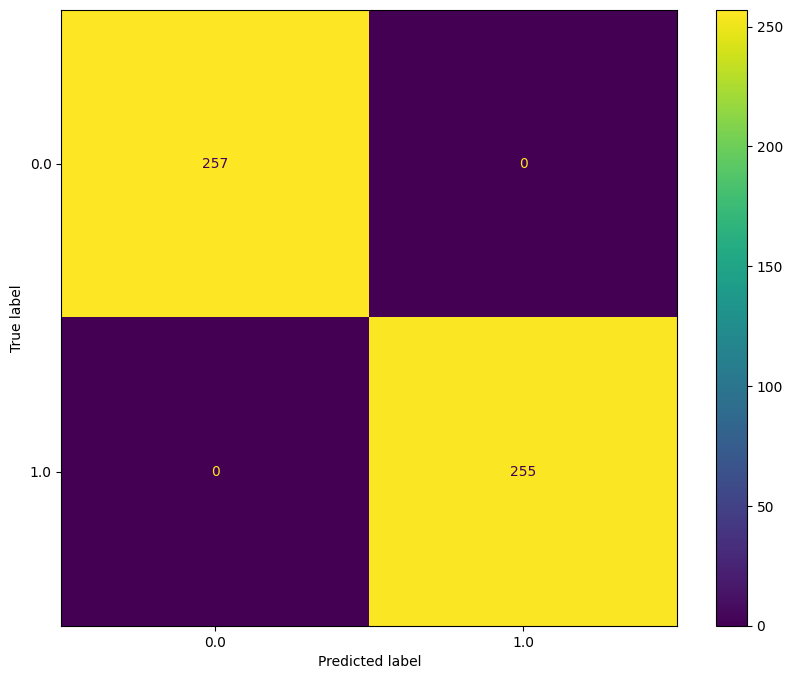

In [90]:
# Creating confusion matrix for train set (default parameter)
print('Confusion Matrix Train Set Random Forest Classifier (Default Parameter)')
cm = confusion_matrix(y_train, y_train_rfc, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

Confusion Matrix Train Set Random Forest Classifier (Hyperparameter Tuned)


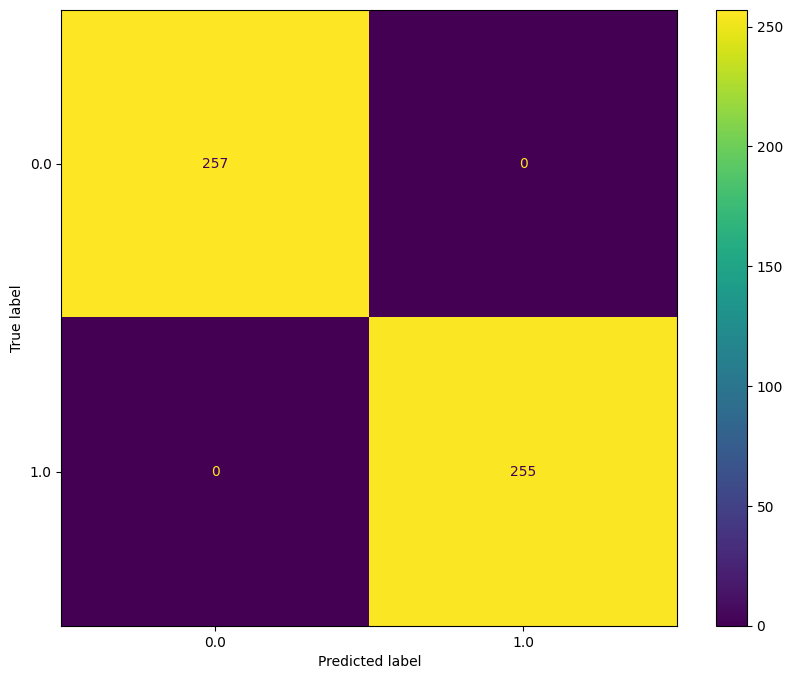

In [91]:
# Creating confusion matrix for train set (hyperparameter tuned)
print('Confusion Matrix Train Set Random Forest Classifier (Hyperparameter Tuned)')
cm = confusion_matrix(y_train, y_train_rfc_final, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)

matplotlib.rcParams['figure.figsize'] = (10,8)
disp.plot()
plt.show()

### **8.5. Overall Evaluation**

In summary for the model evaluation, apparently **Logistic Regression with default parameter** shows a better result overall, based on F1-score as the focus of the prediction model.

* Logistic regression with hyperparamter tuned is apparently making the model stonger than before, which is almost perfect prediction that can lead to overfit the prediction. Overfitting should be avoided.

* All models, which are hyperparamter tuned, are getting stronger than the default one, especially for Logistic Regression and Decision Tree. Meanwhile, SVM and Random Forest Classifier are still the same and too strong for the dataset, which is why the F1-score for both are 100% already and not changed at all.

#### **8.5.1. Logistic Regression**

In [92]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_train_log),
    'train - recall' : recall_score(y_train, y_train_log),
    'train - accuracy' : accuracy_score(y_train, y_train_log),
    'train - f1_score' : f1_score(y_train, y_train_log),
    'test - precision' : precision_score(y_test, y_test_log),
    'test - recall' : recall_score(y_test, y_test_log),
    'test - accuracy' : accuracy_score(y_test, y_test_log),
    'test - f1_score' : f1_score(y_test, y_test_log),
}
all_reports['Baseline LogReg (Default)'] = score_reports

In [93]:
score_reports = {
    'train - precision' : precision_score(y_train, y_train_log_final),
    'train - recall' : recall_score(y_train, y_train_log_final),
    'train - accuracy' : accuracy_score(y_train, y_train_log_final),
    'train - f1_score' : f1_score(y_train, y_train_log_final),
    'test - precision' : precision_score(y_test, y_test_log_final),
    'test - recall' : recall_score(y_test, y_test_log_final),
    'test - accuracy' : accuracy_score(y_test, y_test_log_final),
    'test - f1_score' : f1_score(y_test, y_test_log_final),
}
all_reports['LogReg Tuned'] = score_reports

pd.DataFrame(all_reports).sort_index()

,Baseline LogReg (Default),LogReg Tuned
test - accuracy,0.931818,0.959091
test - f1_score,0.930876,0.957746
test - precision,0.952830,1.000000
test - recall,0.909910,0.918919
train - accuracy,0.929688,0.968750
train - f1_score,0.927126,0.967611
train - precision,0.958159,1.000000
train - recall,0.898039,0.937255


#### **8.5.2. SVM**

In [94]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_train_svm),
    'train - recall' : recall_score(y_train, y_train_svm),
    'train - accuracy' : accuracy_score(y_train, y_train_svm),
    'train - f1_score' : f1_score(y_train, y_train_svm),
    'test - precision' : precision_score(y_test, y_test_svm),
    'test - recall' : recall_score(y_test, y_test_svm),
    'test - accuracy' : accuracy_score(y_test, y_test_svm),
    'test - f1_score' : f1_score(y_test, y_test_svm),
}
all_reports['Baseline SVM (Default)'] = score_reports

In [95]:
score_reports = {
    'train - precision' : precision_score(y_train, y_train_svm_final),
    'train - recall' : recall_score(y_train, y_train_svm_final),
    'train - accuracy' : accuracy_score(y_train, y_train_svm_final),
    'train - f1_score' : f1_score(y_train, y_train_svm_final),
    'test - precision' : precision_score(y_test, y_test_svm_final),
    'test - recall' : recall_score(y_test, y_test_svm_final),
    'test - accuracy' : accuracy_score(y_test, y_test_svm_final),
    'test - f1_score' : f1_score(y_test, y_test_svm_final),
}
all_reports['SVM Tuned'] = score_reports

pd.DataFrame(all_reports).sort_index()

,Baseline SVM (Default),SVM Tuned
test - accuracy,0.990909,0.990909
test - f1_score,0.990909,0.990909
test - precision,1.000000,1.000000
test - recall,0.981982,0.981982
train - accuracy,0.994141,1.000000
train - f1_score,0.994083,1.000000
train - precision,1.000000,1.000000
train - recall,0.988235,1.000000


#### **8.5.3. Decision Tree**

In [96]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_train_dt),
    'train - recall' : recall_score(y_train, y_train_dt),
    'train - accuracy' : accuracy_score(y_train, y_train_dt),
    'train - f1_score' : f1_score(y_train, y_train_dt),
    'test - precision' : precision_score(y_test, y_test_dt),
    'test - recall' : recall_score(y_test, y_test_dt),
    'test - accuracy' : accuracy_score(y_test, y_test_dt),
    'test - f1_score' : f1_score(y_test, y_test_dt),
}
all_reports['Baseline DT (Default)'] = score_reports

In [97]:
score_reports = {
    'train - precision' : precision_score(y_train, y_train_dt_final),
    'train - recall' : recall_score(y_train, y_train_dt_final),
    'train - accuracy' : accuracy_score(y_train, y_train_dt_final),
    'train - f1_score' : f1_score(y_train, y_train_dt_final),
    'test - precision' : precision_score(y_test, y_test_dt_final),
    'test - recall' : recall_score(y_test, y_test_dt_final),
    'test - accuracy' : accuracy_score(y_test, y_test_dt_final),
    'test - f1_score' : f1_score(y_test, y_test_dt_final),
}
all_reports['DT Tuned'] = score_reports

pd.DataFrame(all_reports).sort_index()

,Baseline DT (Default),DT Tuned
test - accuracy,0.977273,0.986364
test - f1_score,0.976959,0.986301
test - precision,1.000000,1.000000
test - recall,0.954955,0.972973
train - accuracy,1.000000,0.996094
train - f1_score,1.000000,0.996063
train - precision,1.000000,1.000000
train - recall,1.000000,0.992157


#### **8.5.4. Random Forest Classifier**

In [98]:
# Save Classification Report into a Dictionary

all_reports = {}
score_reports = {
    'train - precision' : precision_score(y_train, y_train_rfc),
    'train - recall' : recall_score(y_train, y_train_rfc),
    'train - accuracy' : accuracy_score(y_train, y_train_rfc),
    'train - f1_score' : f1_score(y_train, y_train_rfc),
    'test - precision' : precision_score(y_test, y_test_rfc),
    'test - recall' : recall_score(y_test, y_test_rfc),
    'test - accuracy' : accuracy_score(y_test, y_test_rfc),
    'test - f1_score' : f1_score(y_test, y_test_rfc),
}
all_reports['Baseline RFC (Default)'] = score_reports

In [99]:
score_reports = {
    'train - precision' : precision_score(y_train, y_train_rfc_final),
    'train - recall' : recall_score(y_train, y_train_rfc_final),
    'train - accuracy' : accuracy_score(y_train, y_train_rfc_final),
    'train - f1_score' : f1_score(y_train, y_train_rfc_final),
    'test - precision' : precision_score(y_test, y_test_rfc_final),
    'test - recall' : recall_score(y_test, y_test_rfc_final),
    'test - accuracy' : accuracy_score(y_test, y_test_rfc_final),
    'test - f1_score' : f1_score(y_test, y_test_rfc_final),
}
all_reports['RFC Tuned'] = score_reports

pd.DataFrame(all_reports).sort_index()

,Baseline RFC (Default),RFC Tuned
test - accuracy,0.990909,0.990909
test - f1_score,0.990909,0.990909
test - precision,1.000000,1.000000
test - recall,0.981982,0.981982
train - accuracy,1.000000,1.000000
train - f1_score,1.000000,1.000000
train - precision,1.000000,1.000000
train - recall,1.000000,1.000000


## **9. Model Saving**

In [100]:
# Save the model files
with open('logreg_gridcv.pkl', 'wb') as file_1:
  joblib.dump(logreg_gridcv_best, file_1)

In [101]:
# Load all model files
with open('logreg_gridcv.pkl', 'rb') as file_1:
  log_model = joblib.load(file_1)

## **10. Model Inference**

In [102]:
df_inf

,sex,age,Mjob,Fjob,studytime,failures,schoolsup,famsup,paid,higher,Dalc,Walc,health,absences,G1,G2,G3
6,M,16.0,other,other,2,0.0,no,no,no,yes,1,1,3,0.0,12.0,12.0,11.0
47,M,16.0,health,services,4,0.0,no,no,no,yes,1,1,2,4.0,19.0,19.0,20.0
70,M,16.0,other,other,4,0.0,no,yes,yes,yes,1,1,5,0.0,13.0,15.0,15.0
146,F,15.0,health,services,2,3.0,no,yes,no,yes,1,1,3,0.0,6.0,7.0,0.0
160,M,17.0,at_home,other,1,2.0,no,no,no,no,2,2,5,0.0,7.0,6.0,0.0
186,M,16.0,services,services,1,0.0,no,yes,yes,yes,1,2,3,2.0,11.0,12.0,11.0
189,M,17.0,at_home,other,2,0.0,no,no,no,yes,1,5,3,4.0,8.0,9.0,10.0
241,M,17.0,teacher,other,2,0.0,no,yes,yes,yes,2,3,4,2.0,10.0,11.0,12.0
291,F,17.0,health,services,3,0.0,no,yes,yes,yes,1,2,3,0.0,15.0,15.0,15.0
384,M,18.0,other,other,1,1.0,no,no,yes,yes,4,3,3,14.0,6.0,5.0,5.0


In [103]:
# Predict target inference
y_inf = log_model.predict(df_inf)
y_inf = pd.DataFrame(y_inf, columns=['Prediction'],index=df_inf.index)

In [104]:
# Comparing the real target and prediction
model_inf = pd.concat([df_inf['higher'], y_inf['Prediction']], axis=1).sort_index()
model_inf

,higher,Prediction
6,yes,1.0
47,yes,1.0
70,yes,1.0
146,yes,1.0
160,no,0.0
186,yes,1.0
189,yes,0.0
241,yes,1.0
291,yes,1.0
384,yes,1.0


From model inference, we can see thereis one mispredicted student, which is number **189** that apparently the student is suggested to get a higher education, but the prediction says the student should not get a higher education.

After checking the dataset inference, this student #189 has no failure in the past classes. However, the alcohol consumption on the weekend, absences, grade scores apparently predict the student not to continue their study to a higher education.

## **11. Conclusion**

We can conclude that the model--using Logistic Regression default parameter--predicts students who should continue their study or not, and apparently the prediction suggests that more students with alcohol habits are included as **"failing to continue their study"**, which is showed by True Positive (0-0) with number of predicted students `247`. Meanwhile for its opposite, which is True Negative (1-1), there are `229` students predicted to **"passing to continue their study"**.

Even based on the other models with different algorithms (such as SVM, Decision Tree, and Random Forest Classifier) seem predict the same result, however, this one Logistic Regression has a better result which is less overfit than the othe models.

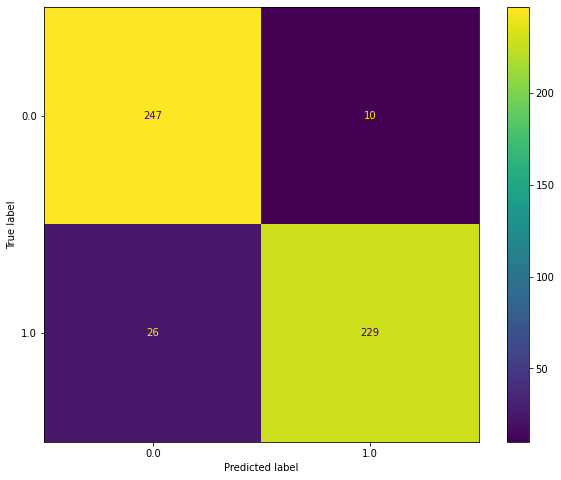

**Suggestions**

This can refers that **Educational Institution** and **Health Organization** in Portugal should take more attention for students with alcohol consumption habits, which should be controlled even more, because the effects of alcohol indeed creates students' perfomance worsen.

- The lagalization for alcohol consumption should not be allowed for student, or underage of young adults (around 20 years old).
- Since there are many students who want to continue their study, but these students struggle with their study performance because of alcohol habits and other backgrounds, parents and education institution should make a consistent meeting to maintain student for not consuming alcohol excessively.
